In [10]:
import pandas as pd
import numpy as np
import os

'''
Checking for same column names.
'''

test_file = 'UNSW_NB15_test-set.csv'
train_file = 'UNSW_NB15_training-set.csv'

test_df = pd.read_csv(os.path.join('data', test_file))
train_df = pd.read_csv(os.path.join('data', train_file))

print('Unfiltered ' + test_file + ' dataframe shape: ' + str(test_df.shape))
print('Unfiltered ' + train_file + ' dataframe shape: ' + str(train_df.shape))

# Find common columns between test and training datasets
test_columns = set(test_df.columns)
train_columns = set(train_df.columns)
if test_columns == train_columns:
    print('\n Columns in both files are the same! \n')

common_columns = test_columns.intersection(train_columns)
filtered_test_df = test_df[list(common_columns)]
filtered_train_df = train_df[list(common_columns)]

filtered_test_df.drop('is_sm_ips_ports', axis=1, inplace=True)
filtered_train_df.drop('is_sm_ips_ports', axis=1, inplace=True)
filtered_test_df.drop('attack_cat', axis=1, inplace=True)
filtered_train_df.drop('attack_cat', axis=1, inplace=True)

train_df = filtered_train_df
test_df = filtered_test_df

print('Filtered ' + test_file + ' dataframe shape: ' + str(test_df.shape))
print('Filtered ' + train_file + ' dataframe shape: ' + str(train_df.shape))



Unfiltered UNSW_NB15_test-set.csv dataframe shape: (82332, 45)
Unfiltered UNSW_NB15_training-set.csv dataframe shape: (175341, 45)

 Columns in both files are the same! 

Filtered UNSW_NB15_test-set.csv dataframe shape: (82332, 43)
Filtered UNSW_NB15_training-set.csv dataframe shape: (175341, 43)


/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/3516764218.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_test_df.drop('is_sm_ips_ports', axis=1, inplace=True)
/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/3516764218.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train_df.drop('is_sm_ips_ports', axis=1, inplace=True)
/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/3516764218.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [11]:
'''
Drop all rows with missing values.
'''

print('Unfiltered ' + test_file + ' dataframe shape: ' + str(test_df.shape))
print('Unfiltered ' + train_file + ' dataframe shape: ' + str(train_df.shape))

# Replace '-' with NaN
test_df.replace('-', np.nan, inplace=True)
train_df.replace('-', np.nan, inplace=True)

# Remove rows containing NaN values
test_df.dropna(axis=0, how='any', inplace=True)
train_df.dropna(axis=0, how='any', inplace=True)

print('Filtered ' + test_file + ' dataframe shape: ' + str(test_df.shape))
print('Filtered ' + train_file + ' dataframe shape: ' + str(train_df.shape))

# Write the filtered dataframes back to CSV files
test_df.to_csv(test_file, index=False)
train_df.to_csv(train_file, index=False)

train_df



Unfiltered UNSW_NB15_test-set.csv dataframe shape: (82332, 43)
Unfiltered UNSW_NB15_training-set.csv dataframe shape: (175341, 43)
Filtered UNSW_NB15_test-set.csv dataframe shape: (35179, 43)
Filtered UNSW_NB15_training-set.csv dataframe shape: (81173, 43)


,ct_state_ttl,is_ftp_login,state,dload,ct_srv_src,sbytes,response_body_len,synack,proto,dloss,...,smean,sttl,sjit,sload,dmean,ct_flw_http_mthd,ct_dst_ltm,ct_dst_src_ltm,ct_dst_sport_ltm,rate
3,1,1,FIN,3358.622070,1,628,0,0.000000,tcp,3,...,52,62,259.080172,2.740179e+03,64,0,2,3,1,13.677108
11,1,0,FIN,8152.559082,2,56329,0,0.052852,tcp,8,...,909,62,3253.278833,2.118251e+05,79,0,1,2,1,42.520967
15,2,0,INT,0.000000,1,138,0,0.000000,udp,0,...,69,254,0.000000,2.760000e+08,0,0,1,4,1,500000.001300
17,1,0,FIN,19494.048830,3,860,103,0.059201,tcp,2,...,86,62,2124.837873,1.573347e+04,137,1,1,2,1,43.195886
21,1,0,FIN,5301.508789,6,998,0,0.055109,tcp,1,...,100,254,1928.550710,2.127704e+04,45,1,1,1,1,44.376468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,2,0,INT,0.000000,45,114,0,0.000000,udp,0,...,57,254,0.000000,7.600000e+07,0,0,33,45,17,166666.660800
175336,2,0,INT,0.000000,24,114,0,0.000000,udp,0,...,57,254,0.000000,5.066666e+07,0,0,24,24,13,111111.107200
175338,2,0,INT,0.000000,12,114,0,0.000000,udp,0,...,57,254,0.000000,5.066666e+07,0,0,3,13,3,111111.107200
175339,2,0,INT,0.000000,30,114,0,0.000000,udp,0,...,57,254,0.000000,5.066666e+07,0,0,30,30,14,111111.107200


In [12]:
'''
Detect records with categorical values that only appear in training and test data.
'''

print(train_df.shape)
proto_values = None
service_values = None
state_values = None
categorical_columns = {'proto': proto_values, 
                       'service': service_values, 
                       'state': state_values
                       }

for key in categorical_columns.keys():
    test_values = set(test_df[key])
    train_values = set(train_df[key])
    if test_values == train_values:
        print('The values are the same. Dont trip dawg')
    else:
        print('Values only in training data:')
        deleted_values = test_values - train_values
        if not deleted_values:
            print('None found!')
        else:
            print(deleted_values)
        print('Values only in testing data:')
        deleted_values = train_values - test_values
        if not deleted_values:
            print('None found!')
        else:
            print(deleted_values)
    common_values = test_values.intersection(train_values)
    categorical_columns[key] = common_values
    print('Common categorical values for ' + key + ' column:')
    print(common_values)
    print('')

print(train_df.shape)

(81173, 43)
The values are the same. Dont trip dawg
Common categorical values for proto column:
{'udp', 'tcp'}

The values are the same. Dont trip dawg
Common categorical values for service column:
{'ftp', 'ssh', 'dhcp', 'http', 'snmp', 'dns', 'ftp-data', 'pop3', 'ssl', 'smtp', 'irc', 'radius'}

Values only in training data:
{'ACC'}
Values only in testing data:
{'RST'}
Common categorical values for state column:
{'CON', 'REQ', 'INT', 'FIN'}

(81173, 43)


In [13]:
'''
Remove all the records with categorical values that only appear in training and test data.
'''

print('Unfiltered ' + test_file + ' dataframe shape: ' + str(test_df.shape))
print('Unfiltered ' + train_file + ' dataframe shape: ' + str(train_df.shape))

for key in categorical_columns.keys():
    # Find unique values in the test and train datasets for the current column
    test_values = set(test_df[key])
    train_values = set(train_df[key])

    # Find values only in the training data and values only in the testing data
    deleted_values_test = test_values - train_values
    deleted_values_train = train_values - test_values

    # Combine deleted values from both datasets
    deleted_values = deleted_values_test.union(deleted_values_train)

    # Check if there are any deleted values
    if deleted_values:
        # Create a boolean mask to identify records containing deleted values
        mask_test = test_df[key].isin(deleted_values)
        mask_train = train_df[key].isin(deleted_values)
        
        # Delete records containing deleted values from both datasets
        test_df = test_df[~mask_test]
        train_df = train_df[~mask_train]

print('')
print('Filtered ' + test_file + ' dataframe shape: ' + str(test_df.shape))
print('Filtered ' + train_file + ' dataframe shape: ' + str(train_df.shape))

Unfiltered UNSW_NB15_test-set.csv dataframe shape: (35179, 43)
Unfiltered UNSW_NB15_training-set.csv dataframe shape: (81173, 43)

Filtered UNSW_NB15_test-set.csv dataframe shape: (35178, 43)
Filtered UNSW_NB15_training-set.csv dataframe shape: (81159, 43)


In [14]:
'''
Encode categorical features.
'''

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

print(categorical_columns.keys())

for key in categorical_columns.keys():
    encode_text_dummy(test_df, key)

for key in categorical_columns.keys():
    encode_text_dummy(train_df, key)

# Write the filtered dataframes back to CSV files
test_df.to_csv(test_file, index=False)
train_df.to_csv(train_file, index=False)

train_df

dict_keys(['proto', 'service', 'state'])


/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/870641277.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dummy_name] = dummies[x]
/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/870641277.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dummy_name] = dummies[x]
/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/870641277.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

,ct_state_ttl,is_ftp_login,dload,ct_srv_src,sbytes,response_body_len,synack,dloss,dtcpb,djit,...,service-pop3,service-radius,service-smtp,service-snmp,service-ssh,service-ssl,state-CON,state-FIN,state-INT,state-REQ
3,1,1,3358.622070,1,628,0,0.000000,3,1047442890,4991.784669,...,False,False,False,False,False,False,False,True,False,False
11,1,0,8152.559082,2,56329,0,0.052852,8,860716719,106.113453,...,False,False,True,False,False,False,False,True,False,False
15,2,0,0.000000,1,138,0,0.000000,0,0,0.000000,...,False,False,False,True,False,False,False,False,True,False
17,1,0,19494.048830,3,860,103,0.059201,2,3084071099,71.805867,...,False,False,False,False,False,False,False,True,False,False
21,1,0,5301.508789,6,998,0,0.055109,1,3521361798,82.022258,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,2,0,0.000000,45,114,0,0.000000,0,0,0.000000,...,False,False,False,False,False,False,False,False,True,False
175336,2,0,0.000000,24,114,0,0.000000,0,0,0.000000,...,False,False,False,False,False,False,False,False,True,False
175338,2,0,0.000000,12,114,0,0.000000,0,0,0.000000,...,False,False,False,False,False,False,False,False,True,False
175339,2,0,0.000000,30,114,0,0.000000,0,0,0.000000,...,False,False,False,False,False,False,False,False,True,False


In [15]:
''' 
Normalize numeric features.
'''

# Select numerical columns
print(set(train_df.dtypes))
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns
train_df[numerical_cols] = (train_df[numerical_cols] - train_df[numerical_cols].min()) / (train_df[numerical_cols].max() - train_df[numerical_cols].min())
# Normalize numerical columns
test_df[numerical_cols] = (test_df[numerical_cols] - test_df[numerical_cols].min()) / (test_df[numerical_cols].max() - test_df[numerical_cols].min())

print(train_df.shape)
# Unnecessary column for training/testing purposes
test_df.drop('id', axis=1, inplace=True)
train_df.drop('id', axis=1, inplace=True)
print(train_df.shape)

# Write the filtered dataframes back to CSV files
test_df.to_csv(test_file, index=False)
train_df.to_csv(train_file, index=False)

test_df

{dtype('float64'), dtype('bool'), dtype('int64')}
(81159, 58)
(81159, 57)


/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/3923661399.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[numerical_cols] = (train_df[numerical_cols] - train_df[numerical_cols].min()) / (train_df[numerical_cols].max() - train_df[numerical_cols].min())
/var/folders/w5/nq2crsld7qz7kz5c0t4tvx680000gn/T/ipykernel_19846/3923661399.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[numerical_cols] = (test_df[numerical_cols] - test_df[numerical_cols].min()) / (test_df[nume

,ct_state_ttl,is_ftp_login,dload,ct_srv_src,sbytes,response_body_len,synack,dloss,dtcpb,djit,...,service-pop3,service-radius,service-smtp,service-snmp,service-ssh,service-ssl,state-CON,state-FIN,state-INT,state-REQ
35,0.166667,0.0,0.000401,0.017241,0.000052,0.000035,0.307121,0.000363,0.378350,0.000416,...,False,False,False,False,False,False,False,True,False,False
40,0.166667,0.0,0.000285,0.017241,0.000053,0.000036,0.293575,0.000363,0.731533,0.000527,...,False,False,False,False,False,False,False,True,False,False
45,0.166667,0.0,0.000360,0.000000,0.000053,0.000031,0.363977,0.000363,0.280002,0.000552,...,False,False,False,False,False,False,False,True,False,False
49,0.166667,0.0,0.000494,0.017241,0.000051,0.000050,0.238712,0.000363,0.248371,0.000310,...,False,False,False,False,False,False,False,True,False,False
72,0.166667,0.0,0.000289,0.000000,0.000058,0.000030,0.211117,0.000363,0.186895,0.000545,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81462,0.166667,0.0,0.000267,0.000000,0.004746,0.000000,0.227948,0.000182,0.744614,0.000165,...,False,False,False,False,False,False,False,True,False,False
81466,0.166667,0.0,0.000265,0.000000,0.004746,0.000000,0.232334,0.000182,0.970695,0.000178,...,False,False,False,False,False,False,False,True,False,False
81518,0.166667,0.0,0.000250,0.017241,0.004746,0.000000,0.143470,0.000182,0.288107,0.000210,...,False,False,False,False,False,False,False,True,False,False
81540,0.166667,0.0,0.000295,0.034483,0.004746,0.000000,0.118963,0.000182,0.079579,0.000180,...,False,False,False,False,False,False,False,True,False,False


In [16]:
import tensorflow as tf
print('Currently using Tensorflow version: ' + tf.__version__)

Currently using Tensorflow version: 2.16.1


In [17]:
'''
Extract testing and training data from dataframes.
'''
y_train = train_df['label']
X_train = train_df.drop('label', axis=1)  # Exclude 'attack_cat' column

y_test = test_df['label']
X_test = test_df.drop('label', axis=1) # Exclude 'attack_cat' column

print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str(y_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_test shape: ' + str(y_test.shape))

X_train

X_train shape: (81159, 56)
y_train shape: (81159,)
X_test shape: (35178, 56)
y_test shape: (35178,)


,ct_state_ttl,is_ftp_login,dload,ct_srv_src,sbytes,response_body_len,synack,dloss,dtcpb,djit,...,service-pop3,service-radius,service-smtp,service-snmp,service-ssh,service-ssl,state-CON,state-FIN,state-INT,state-REQ
3,0.166667,0.25,0.000150,0.000000,0.000041,0.000000,0.000000,0.000547,0.243888,0.017249,...,False,False,False,False,False,False,False,True,False,False
11,0.166667,0.00,0.000364,0.019608,0.004337,0.000000,0.103000,0.001459,0.200410,0.000367,...,False,False,True,False,False,False,False,True,False,False
15,0.333333,0.00,0.000000,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False
17,0.166667,0.00,0.000869,0.039216,0.000059,0.000016,0.115373,0.000365,0.718098,0.000248,...,False,False,False,False,False,False,False,True,False,False
21,0.166667,0.00,0.000236,0.098039,0.000069,0.000000,0.107399,0.000182,0.819917,0.000283,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.333333,0.00,0.000000,0.862745,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,True,False
175336,0.333333,0.00,0.000000,0.450980,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,True,False
175338,0.333333,0.00,0.000000,0.215686,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,True,False
175339,0.333333,0.00,0.000000,0.568627,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,True,False


In [18]:
# Display information about the DataFrame
print(train_df.info())
print(test_df.info())

# Assuming train_df and test_df are your DataFrames
train_df.to_csv(train_file, index=False)  # index=False to avoid saving the index column
test_df.to_csv(test_file, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 81159 entries, 3 to 175340
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ct_state_ttl       81159 non-null  float64
 1   is_ftp_login       81159 non-null  float64
 2   dload              81159 non-null  float64
 3   ct_srv_src         81159 non-null  float64
 4   sbytes             81159 non-null  float64
 5   response_body_len  81159 non-null  float64
 6   synack             81159 non-null  float64
 7   dloss              81159 non-null  float64
 8   dtcpb              81159 non-null  float64
 9   djit               81159 non-null  float64
 10  spkts              81159 non-null  float64
 11  dttl               81159 non-null  float64
 12  tcprtt             81159 non-null  float64
 13  ct_src_dport_ltm   81159 non-null  float64
 14  dbytes             81159 non-null  float64
 15  dur                81159 non-null  float64
 16  dpkts              81159 n

In [19]:
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str(y_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (81159, 56)
y_train shape: (81159,)
X_test shape: (35178, 56)
y_test shape: (35178,)


In [20]:
''' 
Fully Connected Neural network
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(56,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)
print('Test Precision:', test_precision)
print('Test Recall:', test_recall)

Epoch 1/10


/Users/davidcastrejon/Documents/CSC180/HW/cyber/cyber_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2029/2029 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - Precision: 0.9331 - Recall: 0.9974 - accuracy: 0.9454 - loss: 0.1382 - val_Precision: 1.0000 - val_Recall: 0.9988 - val_accuracy: 0.9988 - val_loss: 0.0065
Epoch 2/10
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - Precision: 0.9739 - Recall: 0.9919 - accuracy: 0.9757 - loss: 0.0583 - val_Precision: 1.0000 - val_Recall: 0.9988 - val_accuracy: 0.9988 - val_loss: 0.0050
Epoch 3/10
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - Precision: 0.9757 - Recall: 0.9920 - accuracy: 0.9770 - loss: 0.0565 - val_Precision: 1.0000 - val_Recall: 0.9977 - val_accuracy: 0.9977 - val_loss: 0.0057
Epoch 4/10
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - Precision: 0.9772 - Recall: 0.9917 - accuracy: 0.9780 - loss: 0.0527 - val_Precision: 1.0000 - val_Recall: 0.9987 - val_accuracy: 0.9987 - val_loss: 0.0045
Epoch 5/10
2029/2029 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - Precision: 0.9772 - Recall: 0.9916 - accuracy: 0.9780 - loss: 0.0513 - val_Precision: 1.0000 - va

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83      9624
         1.0       0.91      0.99      0.95     25554

    accuracy                           0.92     35178
   macro avg       0.94      0.86      0.89     35178
weighted avg       0.92      0.92      0.91     35178

Confusion Matrix:
[[ 6984  2640]
 [  250 25304]]


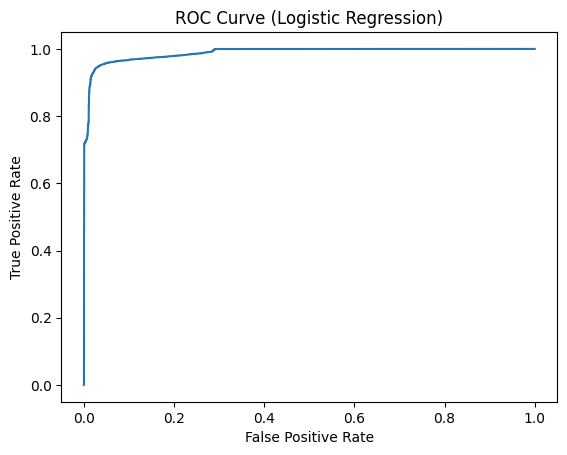

AUC Score: 0.9885042105349445


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
y_pred_prob = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", auc_score)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Train the SVM model on the imputed data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictionså
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83      9624
         1.0       0.90      1.00      0.95     25554

    accuracy                           0.92     35178
   macro avg       0.95      0.85      0.89     35178
weighted avg       0.93      0.92      0.92     35178

Confusion Matrix:
[[ 6827  2797]
 [    8 25546]]


In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (56,)  # Assuming each sample has 56 features

# Create the model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.5),  # Adding dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming 2 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20


/Users/davidcastrejon/Documents/CSC180/HW/cyber/cyber_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9464 - loss: 0.1312 - val_accuracy: 0.9220 - val_loss: 0.1427
Epoch 2/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.9795 - loss: 0.0508 - val_accuracy: 0.9218 - val_loss: 0.1437
Epoch 3/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9810 - loss: 0.0470 - val_accuracy: 0.9228 - val_loss: 0.1576
Epoch 4/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.9812 - loss: 0.0455 - val_accuracy: 0.9259 - val_loss: 0.1282
Epoch 5/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.9809 - loss: 0.0473 - val_accuracy: 0.9231 - val_loss: 0.1378
Epoch 6/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.9809 - loss: 0.0462 - val_accuracy: 0.9307 - val_loss: 0.1252
Epoch 7/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.9815 - loss: 0.0444 - val_accuracy: 0.9378 - val_loss: 0.1307
Epoch 8/20
1269/1269 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.9806 - loss: 0.04

1100/1100 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step


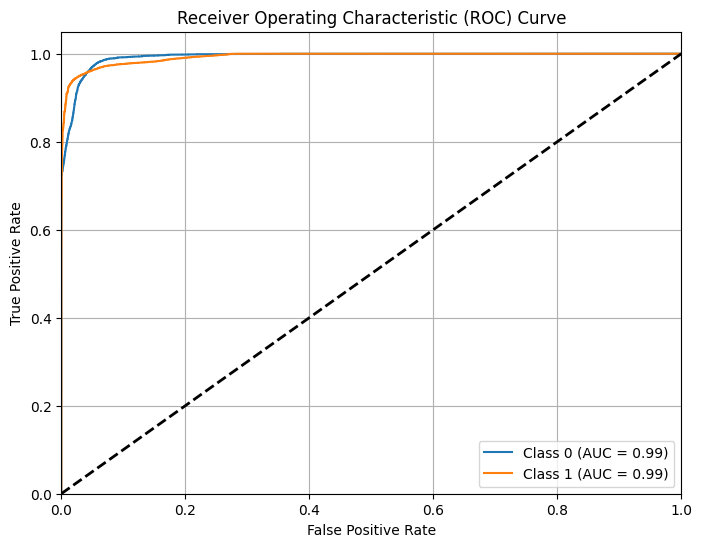

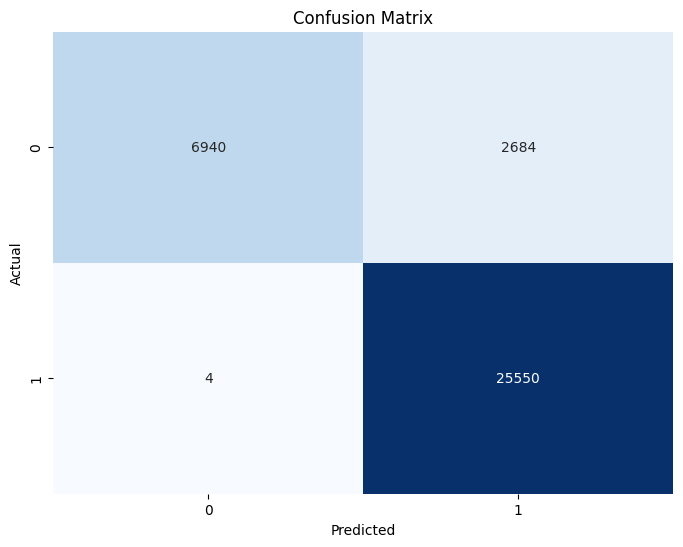

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.72      0.84      9624
         1.0       0.90      1.00      0.95     25554

    accuracy                           0.92     35178
   macro avg       0.95      0.86      0.89     35178
weighted avg       0.93      0.92      0.92     35178

Confusion Matrix:
[[ 6940  2684]
 [    4 25550]]


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import seaborn as sns

# Assuming you have your model trained and X_test, y_test loaded

# Get predicted probabilities for the test set
y_pred_prob = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):  # Assuming you have 10 classes
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(2):  # Assuming you have 10 classes
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot random curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Get predicted classes for the test set
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:\n", report)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


